In [26]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

from modules import contour_modules,image_processing_modules

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


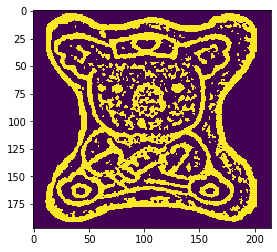

In [27]:
template = cv2.imread('template.png',0)

template_thresh=image_processing_modules.get_edge_binary_image(template)
plt.imshow(template_thresh)

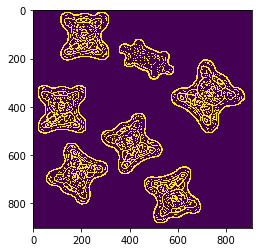

In [41]:
test_img = cv2.imread('test.png',0)
test_img_rgb = cv2.imread('test.png')[:,:,::-1]

test_img_thresh=image_processing_modules.get_edge_binary_image(test_img)
plt.imshow(test_img_thresh)

In [29]:
# contours for template
area_threshold=1
contours_tmp=contour_modules.calc_contours(template_thresh)
contours_tmp=contour_modules.approximate_contours(contours=contours_tmp,min_area=area_threshold,min_len=1)
over_area_image_tmp=contour_modules.draw_contours(template.copy(),contours,0,0)

# contours for imput image
area_threshold=1
contours=contour_modules.calc_contours(test_img_thresh)
contours=contour_modules.approximate_contours(contours=contours,min_area=area_threshold,min_len=1)
over_area_image=contour_modules.draw_contours(test_img.copy(),contours,0,0)

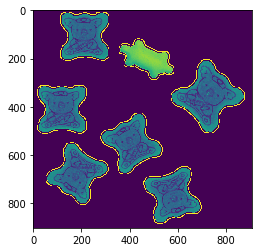

In [30]:
plt.imshow(over_area_image)


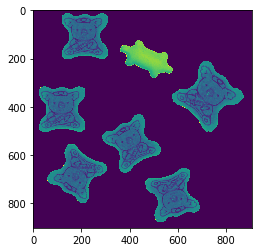

In [31]:
plt.imshow(test_img)

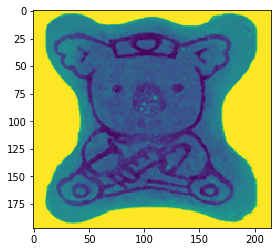

In [32]:
plt.imshow(over_area_image_tmp)

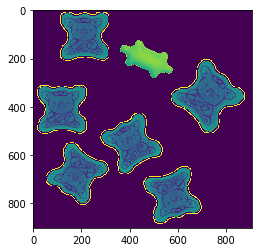

In [61]:
match_shape_threshold=0.1
matched_contours=[cnt for cnt in contours if cv2.matchShapes(cnt,contours_tmp[0],1,0.0)<match_shape_threshold]
plt.imshow(contour_modules.draw_contours(test_img.copy(),matched_contours,0,0))


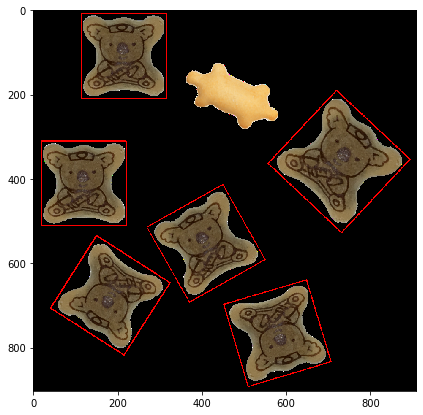

In [67]:
minrect_boxes,box_loc_angle=contour_modules.get_min_rect_boxes_contour(matched_contours,return_loc_and_angle_info=True)

fig=plt.figure(figsize=(7,7))
plt.imshow(contour_modules.draw_contours(test_img_rgb.copy(),minrect_boxes,0,0))
plt.show()



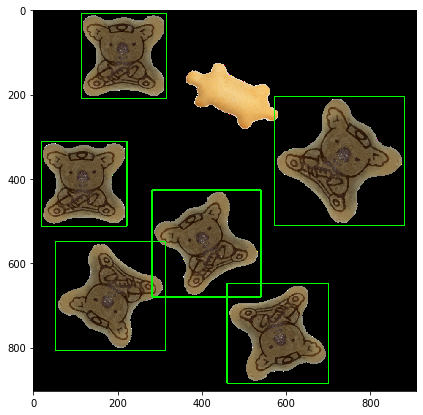

In [68]:
box_locations=contour_modules.get_rect_boxes_location(matched_contours)

fig=plt.figure(figsize=(7,7))
plt.imshow(contour_modules.draw_boxes(test_img_rgb.copy(),box_locations))

In [49]:
contours[0].shape

(364, 1, 2)